<a href="https://colab.research.google.com/github/shourjya19b/E-Commerce-Shopping-Behavior/blob/main/E_Commerce_Shopping_Behaviour.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [ ]:
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, StackingClassifier
from xgboost import XGBClassifier

In [ ]:
data=pd.read_csv('/content/train_data_v2.csv')

In [ ]:
data.shape

(14731, 22)

In [ ]:
data.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase,Made_Purchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,1.0,9.0,3.0,Returning_Visitor,Not Specified,Deny,Not Specified,Other,0.0,False
1,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,2.0,2.0,4.0,Returning_Visitor,Female,Deny,Others,Married,0.0,False
2,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,3.0,1.0,4.0,Returning_Visitor,Female,ALL,Others,Married,1.0,False
3,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.4,...,4.0,3.0,3.0,Returning_Visitor,Male,ALL,Diploma,Single,0.0,False
4,1.0,0.0,0.0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,...,2.0,1.0,5.0,Returning_Visitor,Male,Deny,Diploma,Other,1.0,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14731 entries, 0 to 14730
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   HomePage                         14578 non-null  float64
 1   HomePage_Duration                14581 non-null  float64
 2   LandingPage                      14578 non-null  float64
 3   LandingPage_Duration             14596 non-null  float64
 4   ProductDescriptionPage           14608 non-null  float64
 5   ProductDescriptionPage_Duration  14564 non-null  float64
 6   GoogleMetric:Bounce Rates        14580 non-null  float64
 7   GoogleMetric:Exit Rates          14602 non-null  float64
 8   GoogleMetric:Page Values         14599 non-null  float64
 9   SeasonalPurchase                 14581 non-null  float64
 10  Month_SeasonalPurchase           14587 non-null  object 
 11  OS                               14597 non-null  float64
 12  SearchEngine      

In [ ]:
data.isnull().sum()

HomePage                           153
HomePage_Duration                  150
LandingPage                        153
LandingPage_Duration               135
ProductDescriptionPage             123
ProductDescriptionPage_Duration    167
GoogleMetric:Bounce Rates          151
GoogleMetric:Exit Rates            129
GoogleMetric:Page Values           132
SeasonalPurchase                   150
Month_SeasonalPurchase             144
OS                                 134
SearchEngine                       122
Zone                               117
Type of Traffic                    143
CustomerType                       144
Gender                             145
Cookies Setting                    144
Education                          136
Marital Status                     130
WeekendPurchase                    121
Made_Purchase                        0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
HomePage,14578.0,2.250240,3.288042,0.0,0.000000,1.000000,3.000000,27.000000
HomePage_Duration,14581.0,79.300762,179.374699,0.0,0.000000,5.000000,91.000000,3398.750000
LandingPage,14578.0,0.490739,1.252376,0.0,0.000000,0.000000,0.000000,24.000000
LandingPage_Duration,14596.0,33.455943,140.146256,0.0,0.000000,0.000000,0.000000,2549.375000
ProductDescriptionPage,14608.0,31.559488,44.897089,0.0,7.000000,17.500000,38.000000,705.000000
ProductDescriptionPage_Duration,14564.0,1184.346084,2009.496307,0.0,173.187500,584.333333,1434.255128,63973.522230
GoogleMetric:Bounce Rates,14580.0,0.023366,0.050011,0.0,0.000000,0.003478,0.018182,0.200000
GoogleMetric:Exit Rates,14602.0,0.044664,0.049912,0.0,0.014502,0.026406,0.050000,0.200000
GoogleMetric:Page Values,14599.0,4.812620,16.887366,0.0,0.000000,0.000000,0.000000,361.763742
SeasonalPurchase,14581.0,0.064083,0.202583,0.0,0.000000,0.000000,0.000000,1.000000


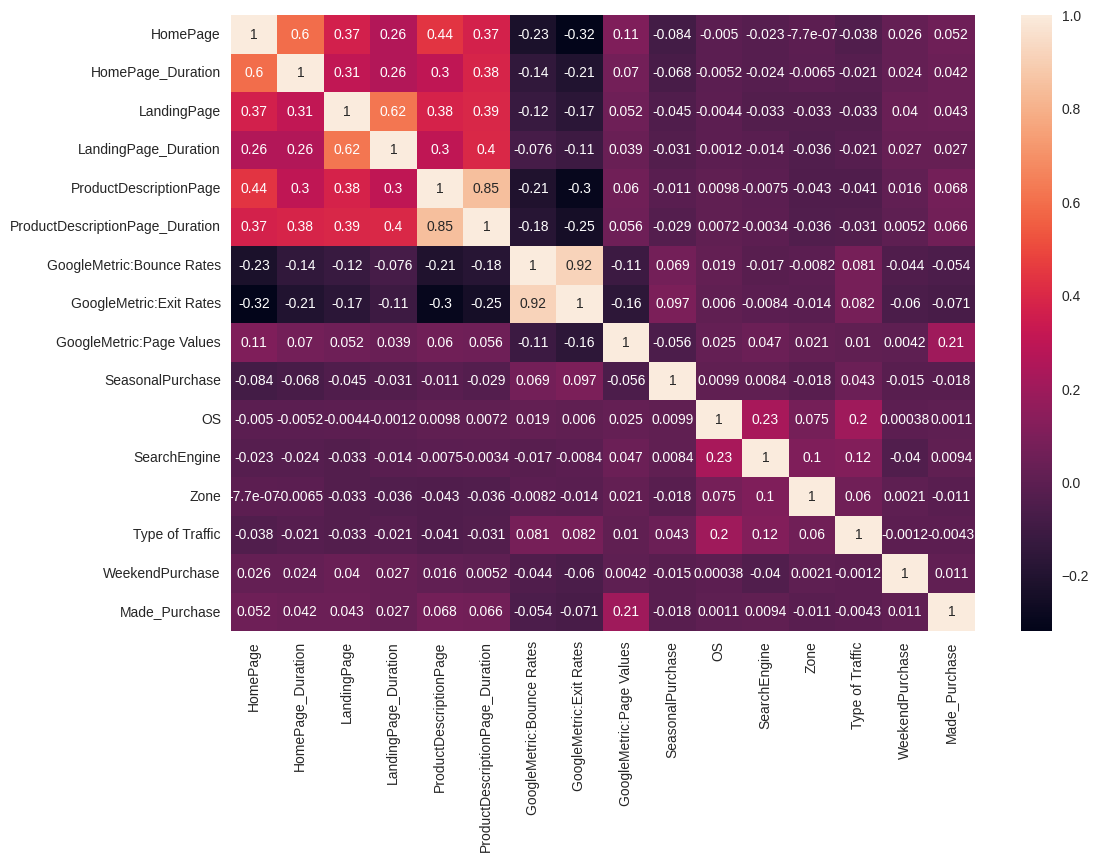

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True),annot=True)
plt.show()

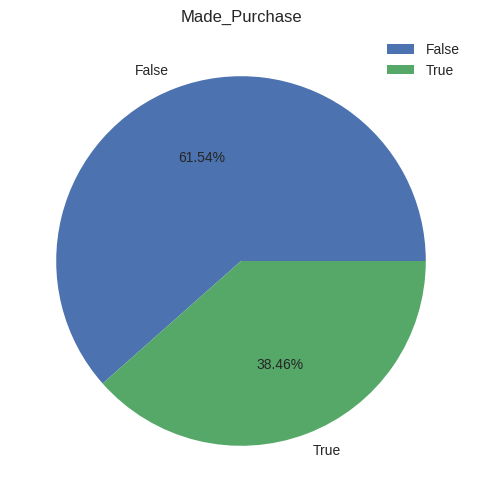

In [ ]:
plt.figure(figsize=(8,6))
plt.pie(data.Made_Purchase.value_counts(),
        labels=["False", "True"],
        autopct='%.2f%%')
plt.title("Made_Purchase")
plt.legend()
plt.show()

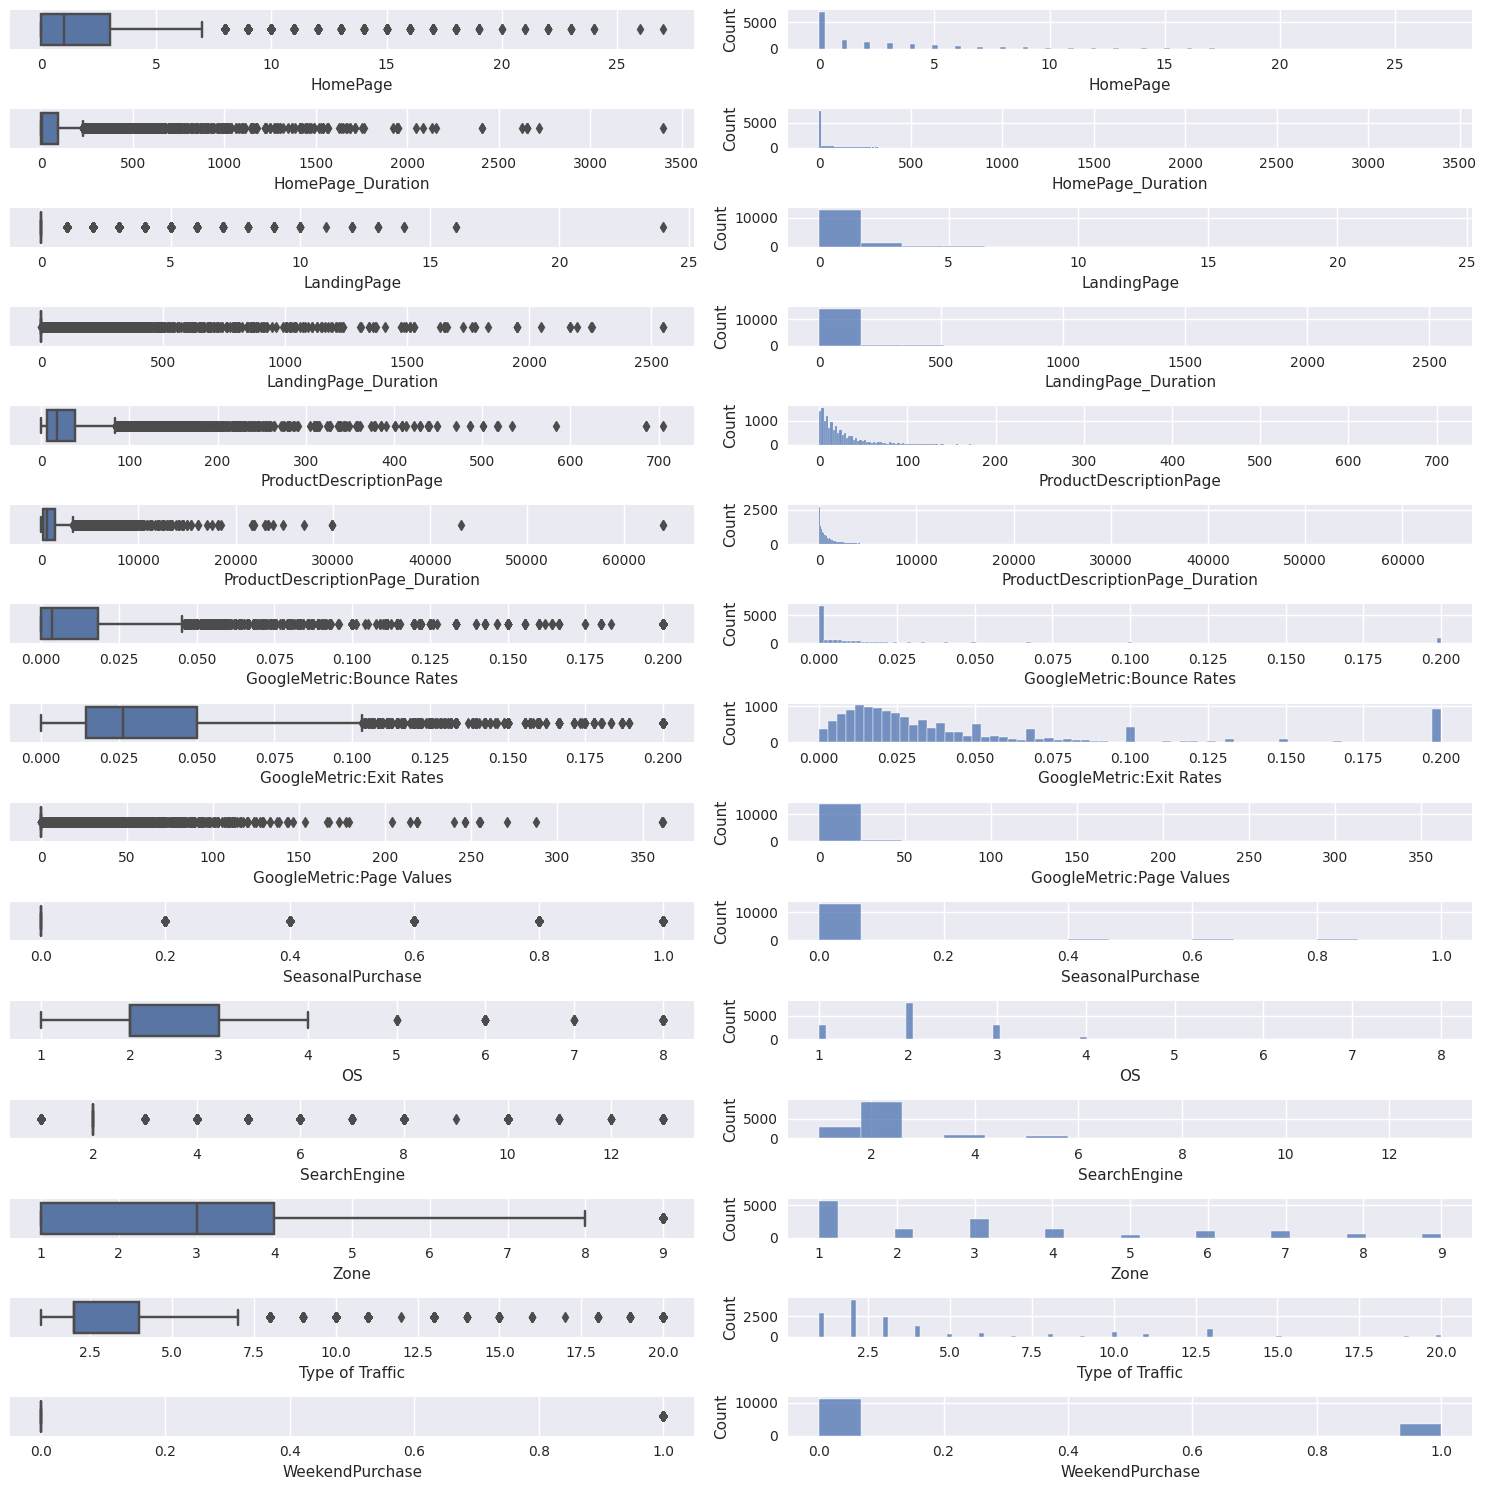

In [ ]:
cols = data.select_dtypes(include=np.number).columns.values
fig, ax = plt.subplots(len(cols), 2, figsize = (15, 15))
sns.set_style('darkgrid')
for i in range(len(cols)):
    sns.boxplot(x= data[cols[i]], ax = ax[i,0])
    sns.histplot(data[cols[i]], ax = ax[i,1])
plt.tight_layout()

In [ ]:
X=data.iloc[:,:-1]

y=data.iloc[:,-1]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
imputer=ColumnTransformer([('num_impute',SimpleImputer(strategy='median'),list(range(0,10))),
                           ('cat_impute',SimpleImputer(strategy='most_frequent'),list(range(10,21)))],
                           remainder='passthrough')

In [ ]:
transformer=ColumnTransformer([('MinMax',MinMaxScaler(),list(range(0,10))),
                               ('cat_encode',OneHotEncoder(),list(range(10,20)))],
                               remainder='passthrough')

In [ ]:
pipe_transformer=Pipeline([('imputer',imputer),('transformer',transformer)])

In [ ]:
X_train=pipe_transformer.fit_transform(X_train)

In [ ]:
X_train.shape

(11784, 87)

In [ ]:
CV=StratifiedKFold(shuffle=True,random_state=42)

In [ ]:
log_reg=LogisticRegression(solver='saga',class_weight='balanced',random_state=42)

#params_log_reg={'penalty':['l2'],'solver':['saga'],'max_iter':[100000],'C':[0.8,0.9,1.0]}

In [ ]:
rand_for=RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=42)

#params_rand_for={'n_estimators':[100,200]}

In [ ]:
grad_boost=GradientBoostingClassifier(n_estimators=25,random_state=42)

#params_grad_boost={'n_estimators':[25,50,75,100]}

In [ ]:
ada_boost=AdaBoostClassifier(n_estimators=25,random_state=42)

In [ ]:
cvs = cross_val_score(log_reg, X_train, y_train, n_jobs=-1, cv=CV, scoring='f1', error_score=0)
print(cvs.mean())

0.47071906861775964


In [ ]:
cvs = cross_val_score(rand_for, X_train, y_train, n_jobs=-1, cv=CV, scoring='f1', error_score=0)
print(cvs.mean())

0.3055882427548318


In [ ]:
cvs = cross_val_score(grad_boost, X_train, y_train, n_jobs=-1, cv=CV, scoring='f1', error_score=0)
print(cvs.mean())

0.3821251793792465


In [ ]:
cvs = cross_val_score(ada_boost, X_train, y_train, n_jobs=-1, cv=CV, scoring='f1', error_score=0)
print(cvs.mean())

0.39438283848316485


In [ ]:
estimators=[('lg',log_reg),('rf',rand_for),('gb',grad_boost),('ab',ada_boost)]

In [ ]:
classifier = StackingClassifier(estimators=estimators)
classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('lg',
                                LogisticRegression(class_weight='balanced',
                                                   random_state=42,
                                                   solver='saga')),
                               ('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(n_estimators=25,
                                                           random_state=42)),
                               ('ab',
                                AdaBoostClassifier(n_estimators=25,
                                                   random_state=42))])

In [ ]:
X_test=pipe_transformer.transform(X_test)

              precision    recall  f1-score   support

       False       0.78      0.85      0.82      1885
        True       0.69      0.58      0.63      1062

    accuracy                           0.75      2947
   macro avg       0.74      0.72      0.72      2947
weighted avg       0.75      0.75      0.75      2947



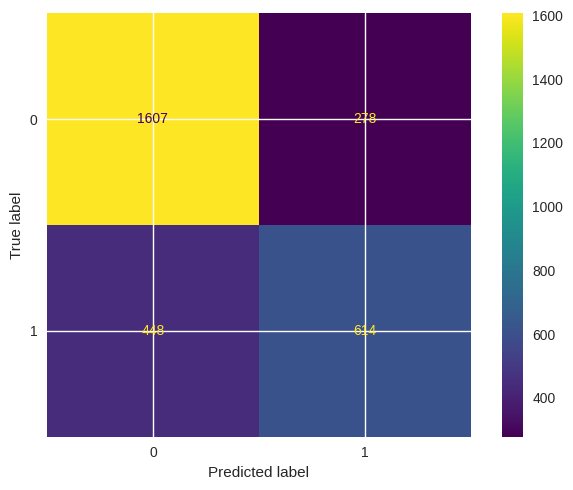

In [ ]:
y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))
cmd = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
cmd.plot()
plt.show()

In [ ]:
final_model=GradientBoostingClassifier(n_estimators=25,random_state=42)

In [ ]:
final_model.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=25, random_state=42)

In [ ]:
data_test=pd.read_csv('/content/test_data_v2.csv')

In [ ]:
data_test.head()

,HomePage,HomePage_Duration,LandingPage,LandingPage_Duration,ProductDescriptionPage,ProductDescriptionPage_Duration,GoogleMetric:Bounce Rates,GoogleMetric:Exit Rates,GoogleMetric:Page Values,SeasonalPurchase,...,OS,SearchEngine,Zone,Type of Traffic,CustomerType,Gender,Cookies Setting,Education,Marital Status,WeekendPurchase
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.0,0.0,...,1.0,1.0,1.0,1.0,Returning_Visitor,Not Specified,Deny,Not Specified,Single,0.0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,...,2.0,2.0,1.0,2.0,Returning_Visitor,Not Specified,ALL,Graduate,Married,0.0
2,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.0,0.0,...,2.0,2.0,1.0,3.0,Returning_Visitor,Female,Required,Diploma,Other,0.0
3,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.0,0.8,...,2.0,2.0,2.0,3.0,Returning_Visitor,Not Specified,Required,Graduate,Other,0.0
4,0.0,0.0,0.0,0.0,16.0,407.750000,0.018750,0.025833,0.0,0.4,...,1.0,1.0,4.0,3.0,Returning_Visitor,Female,Deny,Others,Other,0.0


In [ ]:
X_test=pipe_transformer.transform(data_test)

In [ ]:
X_test.shape

(6599, 41)

In [ ]:
data_test['Made_Purchase']=final_model.predict(X_test)

In [ ]:
data_test['Made_Purchase'].to_csv('E-Commerce Predictions.csv')